# Artificial Neural Networks as Universal Function Approximators
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eleni-vasilaki/rl-notes/blob/main/notebooks/07_deltarule.ipynb)

## Scaling Limits of Tabular Reinforcement Learning

Humans are generally very good at working with approximations. In everyday situations, we rarely feel the need for precision. We don’t say “10:58” unless we’re catching a train; we round to “about 11”. For most people, this isn’t a weakness but a feature: we tend to cope well with inexactness. The same applies to uncertainty. Instead of giving precise probabilities, we speak in terms like “very likely”, “probably not”, or “it could happen”.

Reinforcement learning algorithms are also built around approximation. They often work with partial information, estimated values, and learned predictions. Like us, they try to act effectively without knowing everything exactly. The connection between this kind of reasoning and how we make decisions in practice is one reason RL remains a fascinating yet challenging research field.

Algorithms such as Q-learning and Sarsa aim to approximate the theoretical action-value function $q^*(s, a)$ — the maximum expected return from taking action $a$ in state $s$. The approximate value $Q(s, a)$ is typically stored in a table, as we have seen so far.

Theoretically, an optimal solution is one where $Q(s, a)$ has converged to $q^*(s, a)$. In practice, especially when testing our implementations, we often evaluate performance using simpler metrics — for example, the number of steps required to reach the goal without error.

The main limitation of table-based methods appears when the environment becomes more complex, or the number of possible states and actions grows. To accommodate the increasing number of state-action pairs, the Q-table must grow accordingly. Consider complex games such as Go, Chess, or Backgammon. Storing all possible state-action values in a table would be impractical. 

In high-dimensional or continuous environments — such as motion through physical space — a table-based representation becomes computationally inefficient. Even in simple problems, we can observe how the size of the table grows rapidly with the number of states.

# Exercise

A robot is placed at the beginning of a **linear track** (at state 0) and must reach a reward located at the final state (state 5). The track consists of 6 discrete states, and the robot can move either forward or backward. The goal is to use Q-learning to teach the robot an optimal policy — one that reaches the reward using the fewest possible steps.

Study the provided code template. Implement the missing components: the policy, the update rule, and the episode loop. Then run the training and evaluate the learned behaviour.

- What is the minimum number of steps required to reach the reward?
- How many Q-values must be learned in this environment?
- How many episodes are typically needed before the agent reaches the goal consistently, taking the minimum number of steps?
- Increase the number of states to 30. What is now the optimal number of steps, and how many Q-values are required?
- How does the number of episodes required to learn the optimal behaviour change in the larger environment?
- Plot the Q-values of both actions as a function of state.
- Do the Q-values converge at the same time as the agent’s behaviour? If not, which converges first?
- How does scaling the environment affect the learning time? How could this issue be improved?

**Note**:  
Use at least 10 independent runs and average the episode statistics when plotting. For Q-values, you may show a single run or an average, as needed.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Environment for the linear track
class LinearTrackEnvironment:
    def __init__(self, track_size):
        """
        Initialise the environment.
        Args:
            track_size (int): Total number of states on the track.
        """
        self.track_size = track_size
        self.actions = 2  # 0 = move backward, 1 = move forward

    def reset(self):
        """
        Reset to initial state.
        Returns:
            (int, bool): Starting state and terminal flag.
        """
        self.state = 0
        self.terminal = False
        return self.state, self.terminal

    def step(self, action):
        """
        Apply action and update internal state.
        Args:
            action (int): 0 = backward, 1 = forward.
        Returns:
            (int, float, bool): Next state, reward, terminal flag.
        """
        if action == 1:
            self.state = min(self.state + 1, self.track_size - 1)
        else:
            self.state = max(0, self.state - 1)

        reward = 1.0 if self.state == self.track_size - 1 else 0.0
        self.terminal = (self.state == self.track_size - 1)
        return self.state, reward, self.terminal


# Q-learning agent
class LinearTrackAgent:
    def __init__(self, environment, epsilon=0.05, eta=0.1, gamma=0.99):
        """
        Initialise the agent.
        Args:
            environment (LinearTrackEnvironment): The environment.
            epsilon (float): Exploration rate.
            eta (float): Learning rate.
            gamma (float): Discount factor.
        """
        self.env = environment
        self.epsilon = epsilon
        self.eta = eta
        self.gamma = gamma
        self.Q = np.zeros((self.env.track_size, self.env.actions))

    def choose_action(self, state):
        # TODO: Implement an epsilon-greedy policy.
        pass

    def update_Q(self, state, action, reward, next_state, terminal):
        # TODO: Implement the Q-learning update.
        pass

    def train(self, episodes=20, runs=100, max_steps=100):
        """
        Train agent.
        Returns:
            steps_run_episode (ndarray): Steps taken per episode.
            Q (ndarray): Final Q-values.
        """
        steps_run_episode = np.zeros((runs, episodes))

        for run in range(runs):
            self.Q = np.zeros((self.env.track_size, self.env.actions))
            for episode in range(episodes):
                state, terminal = self.env.reset()
                steps = 0
                while not terminal and steps < max_steps:
                    # TODO: choose an action using the policy
                    # TODO: take a step in the environment
                    # TODO: update Q-values
                    # TODO: assign new state and increment step count
                    pass
                steps_run_episode[run, episode] = steps

        return steps_run_episode, self.Q

    def plot_learning_progress(self, average_steps_per_episode, optimal_steps_per_episode):
        plt.plot(average_steps_per_episode, label='Average Steps per Episode')
        plt.axhline(y=optimal_steps_per_episode, color='r', linestyle='--', label='Optimal Steps')
        plt.title(f'Learning Progress - Track Size: {self.env.track_size}')
        plt.xlabel('Episode')
        plt.ylabel('Steps')
        plt.legend()
        plt.xlim(0, len(average_steps_per_episode))
        plt.ylim(0, None)
        plt.grid(True)
        plt.show()

    def print_preferred_direction(self):
        preferred_direction = np.argmax(self.Q, axis=1)
        print("\nPreferred direction:", preferred_direction)


# === Main ===
states = 6
epsilon = 0.01
eta = 0.1
gamma = 0.99
max_steps = 20
episodes = 80
runs = 80

env = LinearTrackEnvironment(track_size=states)
agent = LinearTrackAgent(environment=env, epsilon=epsilon, eta=eta, gamma=gamma)

#TODO: Set the optimal number of steps per episode for the given track size. Currently is (wrongly) set to 0.
optimal_steps_per_episode =  0

# === Do not run until implementation is complete ===
# Uncomment the lines below after you have completed the missing methods.

# steps_run_episode, Q_values = agent.train(episodes=episodes, runs=runs, max_steps=max_steps)
# average_steps_per_episode = np.mean(steps_run_episode, axis=0)

# agent.plot_learning_progress(average_steps_per_episode, optimal_steps_per_episode)

# print("\nQ-values (Backward, Forward):")
# for i, row in enumerate(Q_values):
#     print(f"State {i}: [{row[0]:.3f}, {row[1]:.3f}]")

# agent.print_preferred_direction()

<details>
<summary>Show Solution</summary>

```python
import numpy as np
import matplotlib.pyplot as plt

# Environment for the linear track
class LinearTrackEnvironment:
    def __init__(self, track_size):
        """
        Initialise the environment.
        Args:
            track_size (int): Total number of states on the track.
        """
        self.track_size = track_size
        self.actions = 2  # 0 = move backward, 1 = move forward

    def reset(self):
        """
        Reset to initial state.
        Returns:
            (int, bool): Starting state and terminal flag.
        """
        self.state = 0
        self.terminal = False
        return self.state, self.terminal

    def step(self, action):
        """
        Apply action and update internal state.
        Args:
            action (int): 0 = backward, 1 = forward.
        Returns:
            (int, float, bool): Next state, reward, terminal flag.
        """
        if action == 1:
            self.state = min(self.state + 1, self.track_size - 1)
        else:
            self.state = max(0, self.state - 1)

        reward = 1.0 if self.state == self.track_size - 1 else 0.0
        self.terminal = (self.state == self.track_size - 1)
        return self.state, reward, self.terminal


# Q-learning agent
class LinearTrackAgent:
    def __init__(self, environment, epsilon=0.05, eta=0.1, gamma=0.99):
        """
        Initialise the agent.
        Args:
            environment (LinearTrackEnvironment): The environment.
            epsilon (float): Exploration rate.
            eta (float): Learning rate.
            gamma (float): Discount factor.
        """
        self.env = environment
        self.epsilon = epsilon
        self.eta = eta
        self.gamma = gamma
        self.Q = np.zeros((self.env.track_size, self.env.actions))

    def choose_action(self, state):
        """
        Choose action using epsilon-greedy strategy.
        """
        if np.random.rand() < self.epsilon:
            return np.random.choice([0, 1])
        else:
            max_q = np.max(self.Q[state])
            return np.random.choice(np.where(self.Q[state] == max_q)[0])

    def update_Q(self, state, action, reward, next_state, terminal):
        """
        Q-learning update.
        """
        target = reward if terminal else reward + self.gamma * np.max(self.Q[next_state])
        self.Q[state, action] += self.eta * (target - self.Q[state, action])

    def train(self, episodes=20, runs=100, max_steps=100):
        """
        Train agent.
        Returns:
            steps_run_episode (ndarray): Steps taken per episode.
            Q (ndarray): Final Q-values.
        """
        steps_run_episode = np.zeros((runs, episodes))

        for run in range(runs):
            self.Q = np.zeros((self.env.track_size, self.env.actions))
            for episode in range(episodes):
                state, terminal = self.env.reset()
                steps = 0
                while not terminal and steps < max_steps:
                    action = self.choose_action(state)
                    next_state, reward, terminal = self.env.step(action)
                    self.update_Q(state, action, reward, next_state, terminal)
                    state = next_state
                    steps += 1
                steps_run_episode[run, episode] = steps

        return steps_run_episode, self.Q

    def plot_learning_progress(self, average_steps_per_episode, optimal_steps_per_episode):
        plt.plot(average_steps_per_episode, label='Average Steps per Episode')
        plt.axhline(y=optimal_steps_per_episode, color='r', linestyle='--', label='Optimal Steps')
        plt.title(f'Learning Progress - Track Size: {self.env.track_size}')
        plt.xlabel('Episode')
        plt.ylabel('Steps')
        plt.legend()
        plt.xlim(0, len(average_steps_per_episode))
        plt.ylim(0, None)
        plt.grid(True)
        plt.show()

    def print_preferred_direction(self):
        preferred_direction = np.argmax(self.Q, axis=1)
        print("\nPreferred direction:", preferred_direction)


# === Main ===
states = 6
epsilon = 0.01
eta = 0.1
gamma = 0.99
max_steps = 20
episodes = 80
runs = 80

env = LinearTrackEnvironment(track_size=states)
agent = LinearTrackAgent(environment=env, epsilon=epsilon, eta=eta, gamma=gamma)

# For a linear track, the optimal number of steps is (states - 1)
optimal_steps_per_episode = states - 1

steps_run_episode, Q_values = agent.train(episodes=episodes, runs=runs, max_steps=max_steps)
average_steps_per_episode = np.mean(steps_run_episode, axis=0)

agent.plot_learning_progress(average_steps_per_episode, optimal_steps_per_episode)

print("\nQ-values (Backward, Forward):")
for i, row in enumerate(Q_values):
    print(f"State {i}: [{row[0]:.3f}, {row[1]:.3f}]")

agent.print_preferred_direction()

```

**Answers to exercise questions**

- What is the minimum number of steps required to reach the reward?  
The minimum number of steps is one less than the number of states, i.e., $\text{states} - 1$.  
This is immediate for $\text{states} = 2$ (one step needed), and generalises to any $n$-state track by induction.

- How many Q-values must be learned in this environment?  
In the 6-state track we have $2 \times 6 = 12$ Q-values.

- How many episodes are typically needed before the agent reaches the goal consistently taking the minimum number of steps?  
In the 6-state track, the agent may learn optimal behaviour in fewer than 10 episodes. 

- Increase the number of states to 30. What is now the optimal number of steps, and how many Q-values are required?  
Optimal number of steps is $29$. There are 30 states, and each state has 2 possible actions (backward and forward).  
Therefore, the total number of Q-values is $30 \times 2 = 60$.

- How does the number of episodes required to learn the optimal behaviour change in the larger environment?  
In the 30-state case, behavioural convergence tends to occur within 30–40 episodes.

- Plot the Q-values of both actions as a function of state.  
Q-values for the action forward should increase monotonically with proximity to the goal, reflecting the expected return of moving forward from each state. Q-values for the action backward are 0.

- Do the Q-values converge at the same time as the agent’s behaviour? If not, which converges first?  
No, they don't. The agent often discovers and exploits the optimal path before the Q-values have fully converged. Behavioural convergence (choosing the right action) occurs earlier than full numerical value convergence (i.e. no significant change in Q-values).  

- How is scaling the environment affects the learning time? How this issue could be improved?  
As the environment scales, the number of Q-values grows. Since standard Q-learning updates only one state-action pair at a time, more episodes are needed for learning to converge. This can be improved by using eligibility traces. Another desirable improvement would be to allow learning about one state-action pair to inform others — for example, those nearby in state or action space.

</details>

# Exercise

In the one dimensional corridor task, we observed that increasing the number of states increases the time required for the agent to learn an optimal policy. This effect appears even in a deterministic environment with a sparse reward and only two possible actions.

Now consider the same problem extended to a two-dimensional arena.

Suppose the agent moves in a square grid of size $N \times N$. At each state, the agent can choose from 4 actions (up, down, left, right).  

How many Q-values must be learned in total to fully represent the Q-function? Does learning the Q-value of one state-action pair provide any information about others? For simplicity, assume that you are using a vanilla algorithm without eligibility traces. What do you infer for large state spaces?

<details>
<summary>Show Solution</summary>

There are $N^2$ distinct states, and each state has 4 possible actions. Therefore, the total number of state-action pairs is:

$$
\text{Total number of Q-values} = 4N^2
$$

This is the size of the Q-table the agent must estimate to solve the environment.

Learning the value of one state-action pair provides no information about others. Even when states are adjacent and the same action is optimal, standard Q-learning updates only the current pair.

As the number of state-action pairs increases, each must be visited and updated independently. This leads to slower information propagation and longer training times.

</details>

## Replacing the Q-value Table with an Artificial Neural Network

We have previously identified a limitation with storing Q-values in a tabular form. We have also noted that Q-values are, in fact, a function of states and actions. To enhance generalisability, we seek to replace the traditional table with a structure capable of learning the Q-function directly, and less affected by scaling. Here, Artificial Neural Networks (ANNs) offer a promising solution. ANNs, mathematical constructs inspired by the neural architecture of the brain, are capable of approximating functions by learning from samples of input and output data.

We also noted in the example of the linear track that by increasing its size, learning slows down as a direct consequence of the increased number of state-action pairs, given that the algorithm propagates information about reward among consecutive states. In the perhaps over-simplified case of the track, this problem appears to have a direct remedy: the implementation of an eligibility trace. Because of the simplicity and unidimensional nature of the problem, this would indeed be a solution. For the same simple problem in two dimensions, however, eligibility traces would help but would not solve the scaling issue. A neural network could help — provided the state representation supports generalisation. 

For example, in the linear track or its 2D grid generalisation, a simple state representation might be a vector (or matrix) with 0s everywhere except at the agent’s location, marked with 1. A generalising representation might assign 1.0 to the agent’s current location and smaller values (e.g., 0.25) to adjacent positions. Because there is continuity in the space, we expect that neighbouring states require similar actions. By allowing neighbouring states to learn as well as the current state, we improve performance. This generalisation can be best implemented using a neural network, as a function approximator.

In the forthcoming discussion, we will begin by defining a single neuron and its parameters, commonly termed as the weights and biases. We will explore how to adjust these weights to learn functions, applying optimisation principles previously discussed. Subsequent to this foundation, our next session will merge the domains of Reinforcement Learning (RL) and ANNs by substituting the Q-value table with an Artificial Neural Network.

## Artificial neural networks as function approximators

Artificial neural networks have been used in a wide range of applications such as classification, clustering, dialogue systems, signal processing, time series prediction, and many others. The underpinning property that makes these applications possible is that, under certain conditions, neural networks can approximate functions.

In particular, they can approximate arbitrarily complex functions, as long as those functions are sufficiently smooth. They tend to struggle with discontinuities. This approximation ability is not just an empirical observation—it is supported by a formal theory. There are two key papers that establish this result: [Cybenko, 1989](https://web.njit.edu/~usman/courses/cs677/10.1.1.441.7873.pdf) paper for single-layer feedforward networks and a 1991 paper by [Hornik et al, 1991](https://www.sciencedirect.com/science/article/pii/089360809190009T) for multilayer architectures.

The core idea is that if we have a function defined on an input space, and we can sample from this space along with corresponding output values, then a neural network can learn to interpolate between these samples through optimisation. When trained properly, the network generalises beyond the specific examples it has seen, capturing the underlying structure of the function. By “properly,” we mean that the network has not merely memorised the training data, but has learned a functional mapping that reflects the underlying relationship between inputs and outputs.


### Neuron and linear separability

A neuron in an artificial neural network is a basic processing unit, inspired by biological neurons. This artificial neuron receives inputs from multiple sources, combines them in a weighted sum, and then applies an activation function to this sum to produce an output. Mathematically, if we denote $w_{ij}$ as the weight from neuron $j$ to neuron $i$, and $x_j$ as the input from neuron $j$, the output $y_i$ of the neuron can be expressed as:

$$
y_i = f\left(\sum_{j}w_{ij} \cdot x_j + b_i\right)
$$

where $f$ represents the activation function and $b_i$ is the bias term for neuron $i$.

A single neuron is known as a perceptron when it uses a step function as its activation. The operation of a single neuron can be paralleled with the mathematical equation of a straight line, $y = ax + b$, where $y$ represents the output, $x$ the input, $a$ the weight (slope), and $b$ the bias (intercept). This analogy provides insight into why a single neuron alone is only capable of approximating linear functions effectively, or solving “linearly separable problems”. Linear separability implies that inputs are coming from distinct sets and these sets can be separated by lines or hyperplanes.

An example of a linearly separable problem is the logical OR gate, which is a function of two inputs resulting in one output. We can visualise this function by plotting the two inputs on the $x$ and $y$ axes and the output on the $z$ axis in a 3D plot. However, linear separability itself is determined purely in the input space (2D), by observing that the points representing different outputs (0s and 1s) can be separated with a single line. This is not true for all problems; in fact, most problems are non-linearly separable.

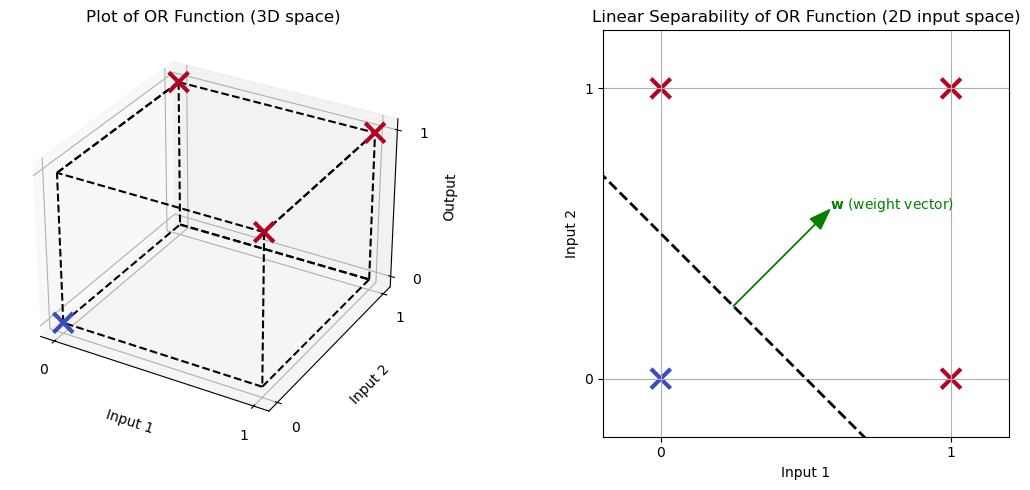

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define OR function inputs and outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 1])

fig = plt.figure(figsize=(12, 5))

# 3D Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(inputs[:, 0], inputs[:, 1], outputs, c=outputs, cmap='coolwarm', s=200, marker='x', linewidth=3, depthshade=False)


# Cube edges for visual clarity
edges = np.array([
    [0, 0, 0], [0, 1, 0], [1, 1, 0], [1, 0, 0], [0, 0, 0],
    [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1],
    [0, 1, 1], [0, 1, 0], [1, 1, 0], [1, 1, 1], [1, 0, 1], [1, 0, 0]
])

for start, end in zip(edges, edges[1:]):
    ax1.plot3D(*zip(start, end), color="black", linestyle='--')

ax1.set_xlabel('Input 1')
ax1.set_ylabel('Input 2')
ax1.set_zlabel('Output')
ax1.set_title('Plot of OR Function (3D space)')
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_zticks([0, 1])

# 2D Plot (Input space linear separability)
ax2 = fig.add_subplot(122)
ax2.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='coolwarm', s=200, marker='x', linewidth=3)


# Decision boundary (x + y = 0.5 → y = -x + 0.5)
x_boundary = np.array([0, 0.5])
y_boundary = -x_boundary + 0.5

# Decision boundary (linearly separating hyperplane example)
x_b = np.linspace(-0.5, 1.5, 100)
y_b = -x_b + 0.5
ax2.plot(x_b, y_b, 'k--', linewidth=2)

# Compute midpoint of the visible decision boundary segment
x_mid = (x_boundary[0] + x_boundary[-1]) / 2
y_mid = (y_boundary[0] + y_boundary[-1]) / 2
midpoint = np.array([x_mid, y_mid])

# Weight vector perpendicular to decision boundary
w = np.array([1, 1])
w_unit = w / np.linalg.norm(w)
end = midpoint + 0.4 * w_unit
ax2.arrow(midpoint[0], midpoint[1],
          end[0] - midpoint[0], end[1] - midpoint[1],
          head_width=0.05, head_length=0.07, fc='green', ec='green')

# Axis formatting
ax2.set_xlabel('Input 1')
ax2.set_ylabel('Input 2')
ax2.set_title('Linear Separability of OR Function (2D input space)')
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xlim(-0.2, 1.2)
ax2.set_ylim(-0.2, 1.2)
ax2.grid(True)
ax2.set_aspect('equal', adjustable='box')
ax2.text(end[0] + 0.05, end[1] + 0.05, r'$\mathbf{w}$ (weight vector)', color='green', fontsize=10)

plt.tight_layout()
plt.show()

### Neuron boundary condition

How does the neuron map inputs to a function? A simple example is approximating a binary function, such as the OR example mentioned earlier. In this case, we can define the output of the neuron as 1 if the activation output is greater than 0, and 0 otherwise.

What effectively determines the switch between outputs is the condition $f(\sum_j w_{ij} x_j + b_i ) = 0$. However, all commonly used activation functions (e.g., step, sigmoid, $\tanh$) are approximately linear around 0. This means we can write the condition for the switching point by focusing on the input to the activation function:

$$
\sum_j w_{ij} x_j + b_i = 0
$$

This defines the neuron's decision boundary in input space. It marks the set of input values where the neuron's output transitions from 0 to 1.

### The weight vector is normal to the decision boundary

A normal vector to a surface (or line, in two dimensions) is a vector that is perpendicular to every direction that lies along that surface. In other words, it points directly “away” from the surface, at a right angle, and has zero dot product with any vector that lies within the surface.

A neuron $i$ with two inputs $x_1$, $x_2$ defines a function over $\mathbb{R}^2$ described by the equation:

$$
w_{i1} x_1 + w_{i2} x_2 + b_i = 0,
$$

where $w_{i1}$ and $w_{i2}$ are the weights, and $b_i$ is the bias. The set of points in the input space that satisfy this equation form the \emph{decision boundary}—a straight line dividing the space into two regions corresponding to different output classifications.

Let us define the weight vector $\mathbf{w} = (w_{i1}, w_{i2})$. We want to understand how the weight vector $\mathbf{w}$ relates to the geometry of the decision boundary. A natural idea is to take two distinct points on the boundary and form a vector between them:

$$
\mathbf{x}^{(1)} = (x_1^{(1)}, x_2^{(1)}), \quad \mathbf{x}^{(2)} = (x_1^{(2)}, x_2^{(2)})
$$

$$
\mathbf{v} = (x_1^{(1)} - x_1^{(2)},\ x_2^{(1)} - x_2^{(2)})
$$

This vector represents both direction and distance along the boundary.

Since both points lie on the decision boundary, they each satisfy the equation:

$$
w_{i1} x_1^{(1)} + w_{i2} x_2^{(1)} + b_i = 0
$$

$$
w_{i1} x_1^{(2)} + w_{i2} x_2^{(2)} + b_i = 0
$$

Subtracting these equations allows us to express a condition that relates directly to the vector between the two points:

$$
w_{i1} (x_1^{(1)} - x_1^{(2)}) + w_{i2} (x_2^{(1)} - x_2^{(2)}) = 0
$$

This expression is exactly the definition of the dot product between $\mathbf{w}$ and $\mathbf{v}$—the sum of the products of their corresponding components. Then it follows that:

$$
\mathbf{w} \cdot \mathbf{v} = 0
$$

Since the dot product of $\mathbf{w}$ with any vector $\mathbf{v}$ that lies along the decision boundary is zero, $\mathbf{w}$ is perpendicular to the boundary. Therefore, $\mathbf{w}$ is a normal vector to the decision boundary.

This reasoning generalises naturally to higher dimensions: in $\mathbb{R}^n$, the set of solutions to $\mathbf{w} \cdot \mathbf{x} + b = 0$ defines a hyperplane, and the weight vector $\mathbf{w} \in \mathbb{R}^n$ is normal to that hyperplane for the same reason—the dot product with any direction vector along the hyperplane is zero.


# Exercise

Generalise the above reasoning to the case of a neuron $i$ with $n$ inputs, where the decision boundary is defined by the equation:

$$
\sum_{j=1}^n w_{ij} x_j + b_i = 0
$$

Show that the weight vector $\mathbf{w} = (w_{i1}, w_{i2}, \dots, w_{in})$ is normal to the decision boundary, which in this case is a hyperplane in $\mathbb{R}^n$.


<details>
<summary>Show Solution</summary>

Let $\mathbf{x}^{(1)} = (x_1^{(1)}, x_2^{(1)}, \dots, x_n^{(1)})$ and $\mathbf{x}^{(2)} = (x_1^{(2)}, x_2^{(2)}, \dots, x_n^{(2)})$ be two distinct points that lie on the decision boundary. Then:

$$
\sum_{j=1}^n w_{ij} x_j^{(1)} + b_i = 0, \quad \sum_{j=1}^n w_{ij} x_j^{(2)} + b_i = 0
$$

Subtracting these two equations gives:

$$
\sum_{j=1}^n w_{ij} (x_j^{(1)} - x_j^{(2)}) = 0
$$

Define the vector $\mathbf{v} = \mathbf{x}^{(1)} - \mathbf{x}^{(2)}$. Then:

$$
\mathbf{v} = (x_1^{(1)} - x_1^{(2)},\ x_2^{(1)} - x_2^{(2)},\ \dots,\ x_n^{(1)} - x_n^{(2)})
$$

and

$$
\mathbf{w} \cdot \mathbf{v} = 0
$$

Since the dot product of $\mathbf{w}$ with any such vector $\mathbf{v}$ lying along the decision boundary is zero, it follows that $\mathbf{w}$ is orthogonal to the boundary. Therefore, the weight vector $\mathbf{w}$ is normal to the decision boundary in $\mathbb{R}^n$.
</details>


### The Delta Rule: Derivation of the Backpropagation Algorithm for a single layer ANN.

We aim to "train" a neuron to reproduce a function $\mathbf{y^*}(\mathbf{x})$ that captures the true relationship between inputs and outputs within a given domain. In general $\mathbf{y^*}$ is multidimensional; we use the subscript $i$ to denote its $i$-th component $y^*_i(\mathbf{x})$. The approximate function provided by the neural network is $\mathbf{y}(\mathbf{x})$, whose $i$-th component is denoted as $y_i(\mathbf{x})$.

The training methodology stems from principles of optimisation. We have collected $n$ samples $\mathbf{x}$ from the input domain and their corresponding values $y^t_i(\mathbf{x})$ from the output domain, where the superscript $t$ denotes "true" or "target". These pairs form our training dataset.

To learn such a function, we will require as many output neurons as there are dimensions in $\mathbf{{y^*}}(\mathbf{x})$. The objective is for the neuron's output $y_i$ when presented with $\mathbf{x}$, to closely match $y^*_i(\mathbf{x})$. Accurate predictions for unseen samples require that the training data adequately cover the space of $\mathbf{x}$.

We define a loss function as:

$$
L = \frac{1}{2n} \sum_i \sum_{\mathbf{x}} \left( y_i^t(\mathbf{x}) - y_i(\mathbf{x}; \mathbf{W}) \right)^2,
$$

where $y_i^t(\mathbf{x})$ is the target output for the input $\mathbf{x}$, $n$ the number of samples $\mathbf{x}$, and $y_i(\mathbf{x}; \mathbf{W})$ represents the neuron's output for $\mathbf{x}$ given the weights $\mathbf{W}$. The symbol $\sum_{\mathbf{x}}$ indicates that we are summing the quantities for all $\mathbf{x}$, and the symbol $\sum_i $ that we are summing the error of all output neurons. This loss function is also known as `mean squared error` (MSE). By minimising the MSE, we aim for the neuron to approximate the underlying function $g(\mathbf{x})$ with its output.

For weight updates, we apply the gradient descent method:

$$
\Delta w_{ij} = - \eta \frac{\partial L}{\partial w_{ij}},
$$

where $\eta$ is the learning rate, a typically small positive value facilitating incremental weight adjustments.

The neuron's output $y_i$ is calculated as:

$$
y_i(\mathbf{x}) = f\left(\sum_j w_{ij} x_j + b_i\right),
$$

assuming a sigmoid activation function $f(x) = \frac{1}{1+e^{-x}}$, known for its property $f'(x) = f(x)(1 - f(x))$.

We compute $\frac{\partial L}{\partial w_{ij}}$ for the neuron using the chain rule: 

$$
\frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial y_i(\mathbf{x})} \frac{\partial  y_i(\mathbf{x})}{\partial w_{ij}}
$$


We first replace the symbol $L$ with the specific loss function, here MSE, and then take the derivative. This strategy avoids making a number of mistakes by applying the chain rule without considering the dependencies of the variables. This yields:

$$
\frac{\partial L}{\partial w_{ij}} = - \frac{1}{n} \sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \frac{\partial y_i(\mathbf{x})}{\partial w_{ij}},
$$

where the derivative $\frac{\partial y_i(\mathbf{x})}{\partial w_{ij}}$ accounts for the impact of the weight $w_{ij}$ on the neuron's output. The $\sum_i$ drops because the weight $w_{ij}$ affects only the output neuron $i$. Given the sigmoid activation, this results in:

$$
\frac{\partial y_i(\mathbf{x})}{\partial w_{ij}} = y_i(\mathbf{x})(1 - y_i(\mathbf{x}))x_j.
$$

Thus, the weight update rule becomes:

$$
\Delta w_{ij} = \eta~\frac{1}{n} \sum_{\mathbf{x}} \left(y_i^t(\mathbf{x})- y_i(\mathbf{x})\right) y_i(\mathbf{x})(1 - y_i(\mathbf{x})) x_j.
$$


or by swapping the order of the quantities in the first parenthesis we end up with an equivalent form:

$$
\Delta w_{ij} = - \eta~\frac{1}{n} \sum_{\mathbf{x}} \left(y_i(\mathbf{x})-y_i^t(\mathbf{x})\right) y_i(\mathbf{x})(1 - y_i(\mathbf{x})) x_j.
$$

We can derive the same form of update rule for the bias, if we consider that it is a special weight with an input constantly set to 1. The bias only requires the index of the corresponding neuron to be defined. We will then conclude:

$$
\Delta b_{i} = - \eta~\frac{1}{n} \sum_{\mathbf{x}} \left(y_i(\mathbf{x})-y_i^t(\mathbf{x})\right) y_i(\mathbf{x})(1 - y_i(\mathbf{x})).
$$

To ensure the function is appropriately learned, i.e., it can generalise to achieve good performance with unseen data, we utilise additional samples to form a test set. This test set should **not** have been used in any capacity to tune the model.

A single pass of the training dataset will rarely lead to learning. An **epoch** refers to a single pass of the entire training dataset through the learning algorithm. We typically repeat this process for a number of epochs while monitoring how the error on the training data decreases. An epoch ends when the entire dataset has been used once to update the model parameters.

Such a gradient rule — Δw = η (target – output) × input — is referred to as the delta rule.

# Exercise

Given a single layer neural network, derive the backpropagation update rule using a Rectified Linear Unit ($\text{ReLU}$) activation function:

$$
y_i(\mathbf{x}) = \text{ReLU}\left(\sum_j w_{ij} x_j + b_i\right),
$$


The $\text{ReLU}$ function is defined as $f(h) = \max(0, h)$, where $h$ is the input to the neuron. Assume a loss function:  
$$L = \frac{1}{2n} \sum_{i} \sum_{\mathbf{x}} \left( y_i^t(\mathbf{x}) - y_i(\mathbf{x}; \mathbf{W}) \right)^2,$$ 

where $y_i^t(\mathbf{x})$ represents the target output for input $\mathbf{x}$, and $y_i(\mathbf{x}; \mathbf{W})$ is the output of the neuron.

You should end up with the following updates:
$$
\Delta w_{ij} = \eta~\frac{1}{n}  \sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \cdot {H} \left(\sum_j w_{ij} x_j + b_i \right) \cdot x_j,
$$

and

$$
\Delta b_{i} = \eta~\frac{1}{n}\sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \cdot {H} \left(\sum_j w_{ij} x_j + b_i \right),
$$

where $H(\cdot)$ denotes the Heaviside (or step) function: ${H}(h) = 1$ if $h > 0$, and $0$ otherwise.

Define $\delta_i$ as:

$$\delta_i=  \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \cdot {H} \left(\sum_j w_{ij} x_j + b_i\right).$$

Then the equations can be expressed in a compact form:

$$
\Delta w_{ij} = \eta~\frac{1}{n}\sum_{\mathbf{x}} \delta_i \cdot x_j,
$$

$$
\Delta b_{i} = \eta~\frac{1}{n}\sum_{\mathbf{x}} \delta_i.
$$

<details>
<summary>Show Solution</summary>

The error function is defined as:
$$
L = \frac{1}{2n} \sum_{i} \sum_{\mathbf{x}} \left( y_i^t(\mathbf{x}) - y_i(\mathbf{x}; \mathbf{W}) \right)^2,
$$
where $y_i^t(\mathbf{x})$ is the target output for input $\mathbf{x}$, $n$ the number of samples $\mathbf{x}$, and $y_i(\mathbf{x}; \mathbf{W})$ denotes the neuron's output for $\mathbf{x}$ with weight $\mathbf{W}$. Minimizing this error aims to make the neuron approximate the function $g(\mathbf{x})$.

#### Weight Update via Gradient Descent
The gradient descent method updates weights as follows:
$$
\Delta w_{ij} = -\eta \frac{\partial L}{\partial w_{ij}},
$$
with $\eta$ being the learning rate, facilitating incremental adjustments.

#### Neuron Output with ReLU Activation
With a $\text{ReLU}$ activation function, $f(h) = \max(0, h)$, the neuron's output is:
$$
y_i(\mathbf{x}) = \max(0, \sum_j w_{ij} x_j + b_i).
$$

#### Derivative for ReLU Activation
The partial derivative of the error $L$ with respect to a weight $w_{ij}$ involves:
$$
\frac{\partial L}{\partial w_{ij}} = - \frac{1}{n} \sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \frac{\partial y_i(\mathbf{x})}{\partial w_{ij}},
$$
where $\frac{\partial y_i(\mathbf{x})}{\partial w_{ij}}$ is determined by the ReLU's gradient with respect to the weight $w_{ij}$. 

We recall that the $\text{ReLU}$ function is piecewise linear:

$$
\text{ReLU}\left (\sum_j w_{ij} x_j + b_i \right) = \begin{cases} 
\sum_j w_{ij} x_j + b_i & \text{if } (\sum_j w_{ij} x_j + b_i) > 0\\
0 & \text{otherwise} 
\end{cases}.
$$

Taking the derivatives in the two parts separately we note there is a discontinuity at $\sum_j w_{ij} x_j + b_i = 0$ where there is a jump from 0 to 1. But for practical implementations we can define the derivative of ReLU wrt. the weight $w_{ij}$ as follows:

$$
\frac{\partial }{\partial w_{ij}} \text{ReLU}(\sum_j w_{ij} x_j + b_i) = \begin{cases} 
x_j & \text{if } \sum_j w_{ij} x_j + b_i > 0 \\
0 & \text{otherwise} 
\end{cases}
$$

which we can write more elegantly as:
$$
\frac{\partial y_i(\mathbf{x})}{\partial w_{ij}} = 
H\left(\sum_j w_{ij} x_j + b_i \right) x_j,  
$$

where $H$ is the Heaviside (or step) function.

#### Simplified Weight Update Rule for ReLU
The weight update rule simplifies to:
$$
\Delta w_{ij} = \eta~\sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \cdot H\left(\sum_j w_{ij} x_j + b_i \right) \cdot x_j.
$$

Similarly for the biases:

$$
\Delta b_{i} = \eta~\sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \cdot  H\left(\sum_j w_{ij} x_j + b_i \right).
$$

</details>

### Efficient Implementation of the ANN update rules

We revisit the neuron equation:
$$
y_i(\mathbf{x}) = f\left(\sum_j w_{ij} x_j + b_i\right)
$$

Programming this directly as written would be inefficient due to the need to loop through the summation term $\sum_j w_{ij} x_j$ for each neuron $i$. To enhance efficiency, we express the computation in matrix form and utilise NumPy's efficient matrix operations.

In this context, **batch size** (`batch_size`) refers to the amount of data over which we train in one iteration. Typically, we select a "batch" from the training data to compute a parameter update, then proceed to the next batch for another update, and so on. For small datasets, however, the **batch size** can be the size of the training set.  

The **input dimension** (`input_dim`) denotes the dimension of $\mathbf{x}$, also known as the number of features in machine learning terminology.

The **output dimension** (`output_dim`) indicates the number of neurons in the layer or the number of output variables the model is designed to predict.

**Matrix Dimensions:**
1. **Input Matrix $\mathbf{X}$**:
   - Dimensions: (`batch_size`, `input_dim`)
   - Represents: Each row represents a sample, each column a feature.

2. **Weight Matrix $\mathbf{W}$**:
   - Dimensions: (`input_dim`, `output_dim`)
   - Represents: Each column specifies the weights connecting all input features to a single neuron.
  
3. **Bias $\mathbf{b}$**:
   - Dimensions: (`output_dim`,)
   - Represents: A constant additive term per neuron, functionally equivalent to a weight on an always-active input.

### Code Snippet:
```python
import numpy as np

# Define input data (X), weights (W), and bias (b)
X = ...  # Input data matrix, shape (batch_size, input_dim)
W = ...  # Weight matrix, shape (input_dim, output_dim)
b = ...  # Bias vector, shape (output_dim,)

# Compute the linear transformation using matrix multiplication
linear_output = X @ W + b  # Alternatively, use np.matmul(X, W) + b. NumPy broadcasts b (shape (output_dim,)) across the batch dimension when added to the matrix product.

# Apply activation function element-wise
y_i = activation_function(linear_output)
```

Similarly, the update rules:

$$
\Delta w_{ij} =- \eta~\frac{1}{n} \frac{\partial L}{\partial w_{ij}}= \eta~\frac{1}{n}  \sum_{\mathbf{x}} \left(y_i^t(\mathbf{x})-y_i(\mathbf{x})\right) y_i(\mathbf{x})(1 - y_i(\mathbf{x})) x_j, 
$$

where $\mathbf{x}$ ranges over the current batch, and

$$
\Delta b_{i} = \eta~\frac{1}{n} \sum_{\mathbf{x}} \left(y_i^t(\mathbf{x})-y_i(\mathbf{x})\right) y_i(\mathbf{x})(1 - y_i(\mathbf{x}))
$$

can be implemented more efficiently using matrix operations as follows.

### Code Snippet:
```python
import numpy as np

# Placeholder definitions for illustration
X = ...  # Input data matrix, shape (batch_size, input_dim)
y_t = ...  # Target values matrix, shape (batch_size, output_dim)
y = ...  # Computed outputs matrix, shape (batch_size, output_dim)
W = ...  # Weight matrix, shape (input_dim, output_dim)
b = ...  # Bias vector, shape (output_dim,)
learning_rate = ...  # Learning rate, a scalar

# Compute the error term
error_term = y_t - y  # Element-wise difference between computed outputs and target values

# Assuming an activation function and computing its derivative
activation_derivative = y * (1 - y)  # Derivative of sigmoid activation; adjust if using a different function

# Element-wise multiplication of the error term and activation derivative
error_times_derivative = error_term * activation_derivative

# Compute updates for weights
# Use matrix multiplication to aggregate contributions from all samples for each weight
# X.T: (input_dim × batch_size), error_times_derivative: (batch_size × output_dim)
# Resulting matrix: (input_dim × output_dim), matching shape of W
update_weights = learning_rate * (X.T @ error_times_derivative) / X.shape[0]

# Compute updates for biases
# Sum over the batch dimension (axis=0) to get individual updates for each output neuron - in case there are more than one neurons
update_biases = learning_rate * np.sum(error_times_derivative, axis=0) / X.shape[0]

# Apply the updates to weights and biases
W += update_weights
b += update_biases
```

### Training, Validation, and Testing

We previously highlighted the need for a separate test set. This separation is crucial because our training data might not capture the input distribution comprehensively, which could hinder our model's ability to generalise to unseen data. To simulate the experience of encountering unseen data, we reserve a portion of our input samples solely for testing purposes. Using these samples in the training and tuning processes would compromise their role as a stand-in for future, unseen data. By the term "tuning" we mean selecting appropriate hyperparameters such as learning rate, network size, etc.

The primary aim with the training data is to minimise error; however, without a dedicated testing set, we face the risk of developing a network that has simply memorised the data without genuinely understanding the underlying relationships between inputs and outputs—a condition known as overfitting.

Given the potential for both favourable and unfavourable data splits between training and testing, particularly with limited data, re-shuffling and re-splitting the data are advisable strategies. Employing cross-validation techniques can significantly enhance the robustness of model evaluation and its generalisability. Cross-validation partitions the data into multiple subsets, systematically using some for training and others for validation across a series of cycles. The k-fold cross-validation method, for instance, divides the training data into k equally sized subsets. In this setup, in each cycle one of the subsets is used as a validation set, while the remaining subsets are combined to form the training set. This process repeats k times, with each subset serving as the validation set exactly once. The average performance across these cycles provides a comprehensive estimate of model performance, helping to mitigate the risk of overfitting and ensuring efficient use of data.

It's important to note that cross-validation is utilised during the model selection and hyperparameter tuning phase, leveraging the training data. The separate test set, however, remains untouched during this phase and is used only after the model has been finalised. This ensures an unbiased evaluation of the model's performance on completely unseen data. In instances where the test set may not fully represent the complexity of real-world scenarios, or if there's concern about its representativeness due to its composition or size, it might be sensible to reconsider the data splitting process. This entails re-shuffling the entire dataset to create new training and test sets, followed by a repeat of the model training, cross-validation, and testing sequence. 


# Exercise

The OR function is a trivial problem, and many benchmark tasks used to evaluate artificial neural networks are similarly simple. However, real-world applications often involve data that are noisy or imperfect, introducing greater challenges for learning systems. As a first step toward handling such imperfections, we will revisit the OR function in a noisy setting, using it as an entry point to studying learning under data variability.

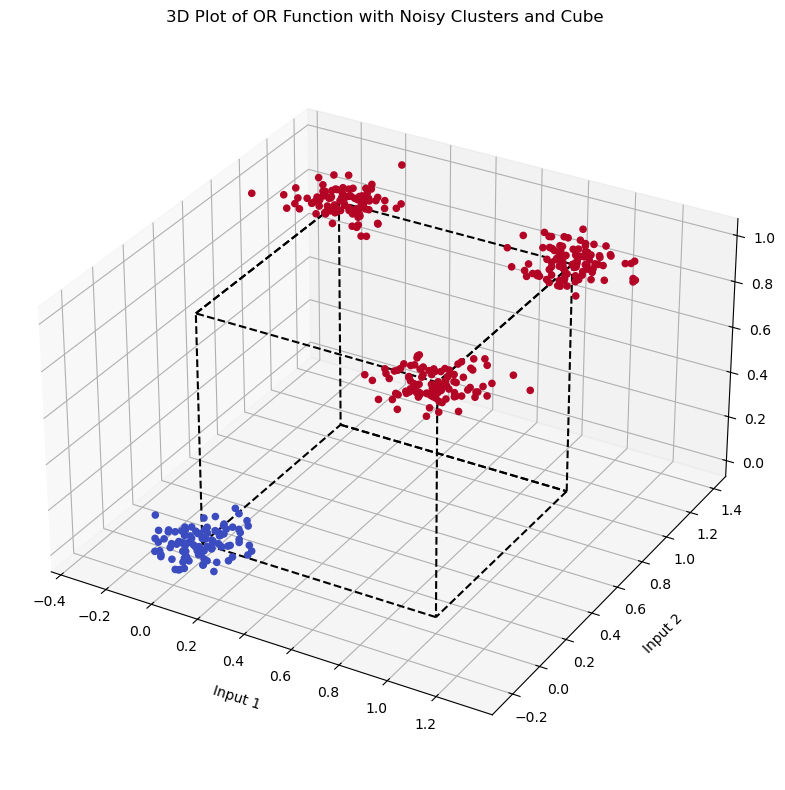

In [8]:
# For illustration purposes, we create a 3D plot of the noisy OR function
# 
import numpy as np
import matplotlib.pyplot as plt
# Define original OR function inputs and outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 1])

# Generate noisy data around the original OR function outputs to form clusters
np.random.seed(42)  # For reproducibility

# Define the number of noisy points per original point
num_noisy_points = 100

# Initialize arrays to hold noisy inputs and outputs
noisy_inputs = []
noisy_outputs = []

# Generate noisy data around each of the original OR function points
for input_point, output_point in zip(inputs, outputs):
    # Generate noisy inputs around the current point
    noisy_inputs.append(input_point + np.random.normal(0, 0.1, size=(num_noisy_points, 2)))
    # Generate noisy outputs around the current output (0 or 1)
    noisy_outputs.append(np.ones(num_noisy_points) * output_point)

# Convert the lists of arrays into single numpy arrays
noisy_inputs = np.concatenate(noisy_inputs)
noisy_outputs = np.concatenate(noisy_outputs)

# Recreate the 3D plot with the noisy data and include the cube for better visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the noisy data
ax.scatter(noisy_inputs[:, 0], noisy_inputs[:, 1], noisy_outputs, c=noisy_outputs, cmap='coolwarm', s=20, depthshade=False)

# Draw a cube to encapsulate the points for clearer visualization
edges = [[0, 0, 0], [0, 1, 0], [1, 1, 0], [1, 0, 0], [0, 0, 0],
         [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1],
         [0, 1, 1], [0, 1, 0], [1, 1, 0], [1, 1, 1], [1, 0, 1], [1, 0, 0]]
edges = np.array(edges)

# Plot the edges of the cube
for start, end in zip(edges, edges[1:]):
    ax.plot3D(*zip(start, end), color="black", linestyle='--')

ax.set_box_aspect([1,1,0.6])  #  aspect ratio


# Label axes
ax.set_xlabel('Input 1', labelpad=10)
ax.set_ylabel('Input 2', labelpad=10)
ax.set_zlabel('Output (Noisy)', labelpad=10)
ax.set_title('3D Plot of OR Function with Noisy Clusters and Cube')

# Set ticks for z-axis
plt.tight_layout()
plt.show()




Train a single neuron model to learn the OR function in the presence of noise. A function to generate a Noisy OR dataset is provided. It simulates real-world imperfections by adding Gaussian noise to the binary inputs and deterministic outputs of the OR function. This function is used to create three distinct datasets: a training set for model fitting, a validation set for tuning hyperparameters and monitoring performance during training, and a test set for final evaluation.

Use a single neuron model with a sigmoidal activation function. Consider the characteristics of the OR function and the role of noise when calculating the prediction error. During evaluation, it is possible to binarise the output to improve accuracy.

- Implement the backpropagation algorithm for a single-layer network. Use the training set to adjust the model's weights. This involves computing the output (forward pass), the error between the model's predictions and the targets, and using this error to update the weights over several epochs (backward pass).

- Use the validation set to monitor the model’s performance during training. This step helps tune hyperparameters, such as the learning rate, to improve accuracy and generalisation. Hyperparameters are not learned from data directly; the modeller sets them before training and adjusts them based on validation results..

- After training and tuning, evaluate the model's generalisation using the test set. This assessment should be carried out with fixed final weights and reflects how well the model handles unseen data.

Template code is provided.

In [9]:
import numpy as np

def generate_noisy_or_data(samples, noise_level=0.1):
    """
    Generate noisy binary input-output pairs for the OR function.

    Args:
        samples (int): Number of examples to generate.
        noise_level (float): Standard deviation of Gaussian noise.

    Returns:
        (ndarray, ndarray): Input features and target values.
    """
    x = np.random.randint(2, size=(samples, 2))                # Binary input features
    y = np.bitwise_or(x[:, 0], x[:, 1]).reshape(-1, 1)         # OR function output
    x_noisy = x + np.random.normal(0, noise_level, x.shape)
    y_noisy = y + np.random.normal(0, noise_level, y.shape)
    return x_noisy, y_noisy


class SingleNeuronModel:
    """
    Single-layer neural model with sigmoid activation.

    Trains on noisy binary targets using squared error loss.
    """
    def __init__(self, input_dim, output_dim):
        """
        Initialise model weights and bias.

        Args:
            input_dim (int): Number of input features.
            output_dim (int): Output dimensionality.
        """
        self.W = np.random.randn(input_dim, output_dim) * 0.01
        self.b = np.zeros((output_dim,))

    def activation(self, h):
        """
        Sigmoid activation function.

        Args:
            h (ndarray): Input to the nonlinearity.

        Returns:
            ndarray: Activated output.
        """
        return 1 / (1 + np.exp(-h))

    def output(self, X):
        """
        Compute model response.

        Args:
            X (ndarray): Input data.

        Returns:
            ndarray: Scalar outputs after nonlinearity.
        """
        #TO DO: Implement the output function
        pass

    def train(self, X, y_t, learning_rate, epochs):
        """
        Train model on input-target pairs.

        Args:
            X (ndarray): Input data.
            y_t (ndarray): Target values.
            learning_rate (float): Step size for parameter updates.
            epochs (int): Number of passes over the data.
        """
        for epoch in range(epochs):
            #TO DO: Implement the training loop
        
            # Report loss periodically
            pass


def evaluate_model(model, data):
    """
    Evaluate binary classification accuracy.

    Args:
        model (SingleNeuronModel): Trained model.
        data (ndarray, ndarray): Input features and target values.

    Returns:
        float: Proportion of correct binary decisions.
    """
    X_test, y_test = data
    predictions = model.output(X_test)
    decisions = predictions > 0.5
    return np.mean(decisions == np.round(y_test))


# === Main ===
training_data   = generate_noisy_or_data(2000)
validation_data = generate_noisy_or_data(300)
test_data       = generate_noisy_or_data(300)

print("Input shape:", training_data[0].shape)
print("Output shape:", training_data[1].shape)

#Uncomment the lines after completing the code
# model = SingleNeuronModel(input_dim=2, output_dim=1)
# model.train(training_data[0], training_data[1], learning_rate=0.1, epochs=1000)

# validation_accuracy = evaluate_model(model, validation_data)
# print(f"Validation Accuracy: {validation_accuracy:.3f}")

# test_accuracy = evaluate_model(model, test_data)
# print(f"Test Accuracy: {test_accuracy:.3f}")

Input shape: (2000, 2)
Output shape: (2000, 1)


<details>
<summary>Show Solution</summary>

```python
import numpy as np

def generate_noisy_or_data(samples, noise_level=0.1):
    """
    Generate noisy binary input-output pairs for the OR function.

    Args:
        samples (int): Number of examples to generate.
        noise_level (float): Standard deviation of Gaussian noise.

    Returns:
        (ndarray, ndarray): Input features and target values.
    """
    x = np.random.randint(2, size=(samples, 2))                # Binary input features
    y = np.bitwise_or(x[:, 0], x[:, 1]).reshape(-1, 1)         # OR function output
    x_noisy = x + np.random.normal(0, noise_level, x.shape)
    y_noisy = y + np.random.normal(0, noise_level, y.shape)
    return x_noisy, y_noisy


class SingleNeuronModel:
    """
    Single-layer neural model with sigmoid activation.

    Trains on noisy binary targets using squared error loss.
    """
    def __init__(self, input_dim, output_dim):
        """
        Initialise model weights and bias.

        Args:
            input_dim (int): Number of input features.
            output_dim (int): Output dimensionality.
        """
        self.W = np.random.randn(input_dim, output_dim) * 0.01
        self.b = np.zeros((output_dim,))

    def activation(self, h):
        """
        Sigmoid activation function.

        Args:
            h (ndarray): Input to the nonlinearity.

        Returns:
            ndarray: Activated output.
        """
        return 1 / (1 + np.exp(-h))

    def output(self, X):
        """
        Compute model response.

        Args:
            X (ndarray): Input data.

        Returns:
            ndarray: Scalar outputs after nonlinearity.
        """
        return self.activation(X @ self.W + self.b)

    def train(self, X, y_t, learning_rate, epochs):
        """
        Train model on input-target pairs.

        Args:
            X (ndarray): Input data.
            y_t (ndarray): Target values.
            learning_rate (float): Step size for parameter updates.
            epochs (int): Number of passes over the data.
        """
        for epoch in range(epochs):
            y_pred = self.output(X)
            delta = y_t - y_pred
            grad = delta * y_pred * (1 - y_pred)

            dW = learning_rate * (X.T @ grad) / X.shape[0]
            db = learning_rate * np.sum(grad, axis=0) / X.shape[0]

            self.W += dW
            self.b += db

            if epoch % 100 == 0:
                loss = np.mean(0.5 * delta**2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")


def evaluate_model(model, data):
    """
    Evaluate binary classification accuracy.

    Args:
        model (SingleNeuronModel): Trained model.
        data (ndarray, ndarray): Input features and target values.

    Returns:
        float: Proportion of correct binary decisions.
    """
    X_test, y_test = data
    predictions = model.output(X_test)
    decisions = predictions > 0.5
    return np.mean(decisions == np.round(y_test))


# === Main ===
training_data   = generate_noisy_or_data(2000)
validation_data = generate_noisy_or_data(300)
test_data       = generate_noisy_or_data(300)

print("Input shape:", training_data[0].shape)
print("Output shape:", training_data[1].shape)

model = SingleNeuronModel(input_dim=2, output_dim=1)
model.train(training_data[0], training_data[1], learning_rate=0.1, epochs=1000)

validation_accuracy = evaluate_model(model, validation_data)
print(f"Validation Accuracy: {validation_accuracy:.3f}")

test_accuracy = evaluate_model(model, test_data)
print(f"Test Accuracy: {test_accuracy:.3f}")
```
</details>

# Exercise

The Boston Housing dataset is a benchmark used in machine learning and statistics for regression tasks. It contains information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts. The dataset includes 506 instances, each representing a suburb of Boston. The target variable is the median value of owner-occupied homes in thousands of dollars (MEDV).

We simplify the dataset by focusing on predicting a linear relationship between the number of rooms in a house and its price. Modify your previous code accordingly to work with these data, incorporating a ReLU activation function instead of a sigmoid one. 

- Because we model positive values, using an output layer of neurons that can only return positive values or 0 due to the ReLU activation function is not causing any issues. If the target values included negative values, we would need an output layer with a different activation function.

- ReLU activation can cause training to stall if all outputs are zero in the first forward pass. This can happen when inputs are positive (as in this dataset) and weights are initialised with negative values. To prevent this, we initialise the weights with small positive values to ensure that at least some units are active from the start. 
Example: self.W = np.abs(np.random.randn(input_dim, output_dim)) * 0.1

The code below downloads, preprocesses, and plots the data.

Train set shape: (354, 1) (354, 1)
Validation set shape: (75, 1) (75, 1)
Test set shape: (77, 1) (77, 1)


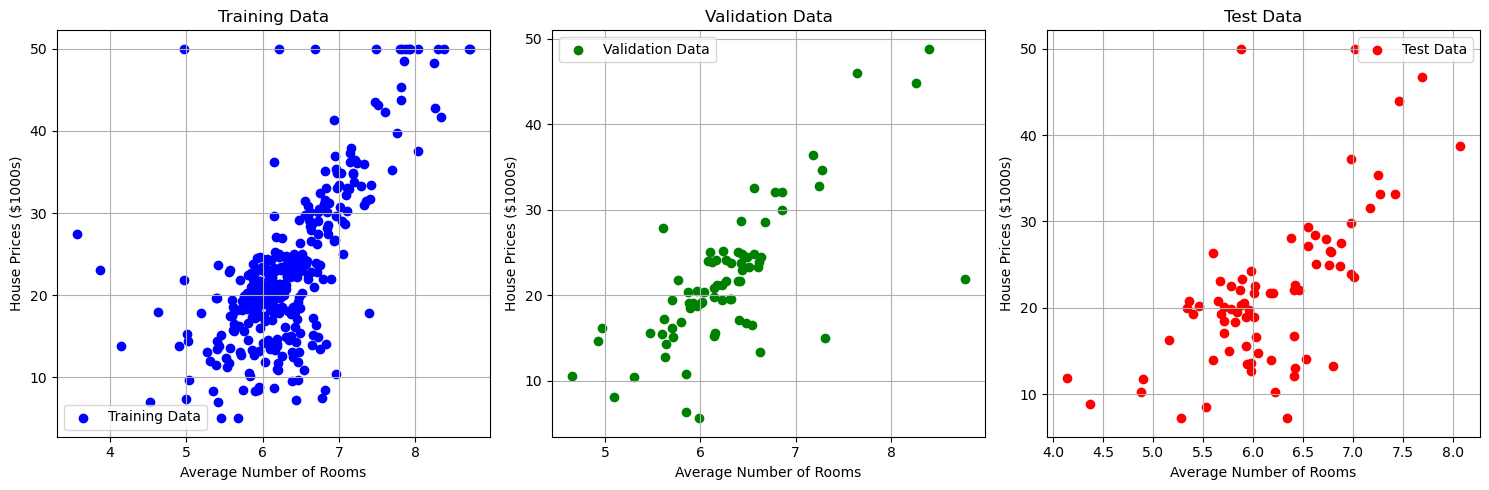

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request


def split_data(X, y, train_size=0.7, valid_size=0.15, test_size=0.15, shuffle=True):
    """
    Partition data into train, validation, and test sets.

    Args:
        X (ndarray): Input features.
        y (ndarray): Target values.
        train_size (float): Proportion of training data.
        valid_size (float): Proportion of validation data.
        test_size (float): Proportion of test data.
        shuffle (bool): Whether to shuffle before splitting.
        seed (int or None): Random seed for reproducibility.

    Returns:
        Tuple of arrays: (X_train, y_train, X_valid, y_valid, X_test, y_test)
    """
    if shuffle:
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

    num_train = int(train_size * len(X))
    num_valid = int(valid_size * len(X))

    X_train, y_train = X[:num_train], y[:num_train]
    X_valid, y_valid = X[num_train:num_train+num_valid], y[num_train:num_train+num_valid]
    X_test,  y_test  = X[num_train+num_valid:], y[num_train+num_valid:]

    return X_train, y_train, X_valid, y_valid, X_test, y_test


# === Main ===

# === Load and prepare data ===
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
with urllib.request.urlopen(url) as response:
    lines = response.read().decode('utf-8').split('\n')

data = np.genfromtxt(lines, delimiter=',', skip_header=1)
X = data[:, 5].reshape(-1, 1)  # Feature: average number of rooms
y = data[:, -1].reshape(-1, 1) # Target: median house value


X_train, y_train, X_valid, y_valid, X_test, y_test = split_data(X, y, shuffle=True)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)



# === Visualise p data for each split ===
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(X_train, y_train, label='Training Data', color='blue')
axs[0].set_title('Training Data')
axs[0].set_xlabel('Average Number of Rooms')
axs[0].set_ylabel('House Prices ($1000s)')
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(X_valid, y_valid, label='Validation Data', color='green')
axs[1].set_title('Validation Data')
axs[1].set_xlabel('Average Number of Rooms')
axs[1].set_ylabel('House Prices ($1000s)')
axs[1].legend()
axs[1].grid(True)

axs[2].scatter(X_test, y_test, label='Test Data', color='red')
axs[2].set_title('Test Data')
axs[2].set_xlabel('Average Number of Rooms')
axs[2].set_ylabel('House Prices ($1000s)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


<details>
<summary>Show Solution</summary>

```python
import numpy as np
import matplotlib.pyplot as plt
import urllib.request


def split_data(X, y, train_size=0.7, valid_size=0.15, test_size=0.15, shuffle=True):
    """
    Partition data into train, validation, and test sets.

    Args:
        X (ndarray): Input features.
        y (ndarray): Target values.
        train_size (float): Proportion of training data.
        valid_size (float): Proportion of validation data.
        test_size (float): Proportion of test data.
        shuffle (bool): Whether to shuffle before splitting.
        seed (int or None): Random seed for reproducibility.

    Returns:
        Tuple of arrays: (X_train, y_train, X_valid, y_valid, X_test, y_test)
    """
    if shuffle:
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

    num_train = int(train_size * len(X))
    num_valid = int(valid_size * len(X))

    X_train, y_train = X[:num_train], y[:num_train]
    X_valid, y_valid = X[num_train:num_train+num_valid], y[num_train:num_train+num_valid]
    X_test,  y_test  = X[num_train+num_valid:], y[num_train+num_valid:]

    return X_train, y_train, X_valid, y_valid, X_test, y_test


class SingleNeuronModel:
    """
    Single-layer regression model with ReLU activation.
    """
    def __init__(self, input_dim, output_dim):
        """
        Initialise model weights and bias.

        Args:
            input_dim (int): Number of input features.
            output_dim (int): Output dimensionality.
        """
        self.W = np.abs(np.random.randn(input_dim, output_dim)) * 0.1
        self.b = np.zeros((output_dim,))

    def relu(self, h):
        return np.maximum(0, h)

    def relu_derivative(self, h):
        return np.where(h > 0, 1, 0)

    def linear_output(self, X):
        return X @ self.W + self.b

    def predict(self, X):
        return self.relu(self.linear_output(X))

    def train(self, X, y_t, learning_rate, epochs):
        """
        Train model using squared loss and gradient descent.

        Args:
            X (ndarray): Input data.
            y_t (ndarray): Target values.
            learning_rate (float): Step size for parameter updates.
            epochs (int): Number of training iterations.
        """
        for epoch in range(epochs):
            h = self.linear_output(X)
            y_pred = self.relu(h)
            delta = y_t - y_pred
            grad = delta * self.relu_derivative(h)

            dW = learning_rate * (X.T @ grad) / X.shape[0]
            db = learning_rate * np.sum(grad, axis=0) / X.shape[0]

            self.W += dW
            self.b += db

            if epoch % 1000 == 0:
                error = np.mean(0.5 * delta**2)
                print(f"Epoch {epoch}, Error: {error:.4f}")


# === Main ===

# === Load and prepare data ===
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
with urllib.request.urlopen(url) as response:
    lines = response.read().decode('utf-8').split('\n')

data = np.genfromtxt(lines, delimiter=',', skip_header=1)
X = data[:, 5].reshape(-1, 1)  # Feature: average number of rooms
y = data[:, -1].reshape(-1, 1) # Target: median house value


X_train, y_train, X_valid, y_valid, X_test, y_test = split_data(X, y, shuffle=True)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

model = SingleNeuronModel(input_dim=1, output_dim=1)
model.train(X_train, y_train, learning_rate=0.01, epochs=10000)


# === Visualise predictions vs. data for each split ===
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(X_train, y_train, label='Training Data', color='blue')
axs[0].plot(X_train, model.predict(X_train), color='orange', linewidth=2, label='Final Model')
axs[0].set_title('Training Data')
axs[0].set_xlabel('Average Number of Rooms')
axs[0].set_ylabel('House Prices ($1000s)')
axs[0].legend()
axs[0].grid(True)

axs[1].scatter(X_valid, y_valid, label='Validation Data', color='green')
axs[1].plot(X_valid, model.predict(X_valid), color='orange', linewidth=2, label='Final Model')
axs[1].set_title('Validation Data')
axs[1].set_xlabel('Average Number of Rooms')
axs[1].set_ylabel('House Prices ($1000s)')
axs[1].legend()
axs[1].grid(True)

axs[2].scatter(X_test, y_test, label='Test Data', color='red')
axs[2].plot(X_test, model.predict(X_test), color='orange', linewidth=2, label='Final Model')
axs[2].set_title('Test Data')
axs[2].set_xlabel('Average Number of Rooms')
axs[2].set_ylabel('House Prices ($1000s)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
```
</details>